In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/wine_fraud.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
df["quality"].unique()

array(['Legit', 'Fraud'], dtype=object)

In [5]:
df["quality"].value_counts()

quality
Legit    6251
Fraud     246
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

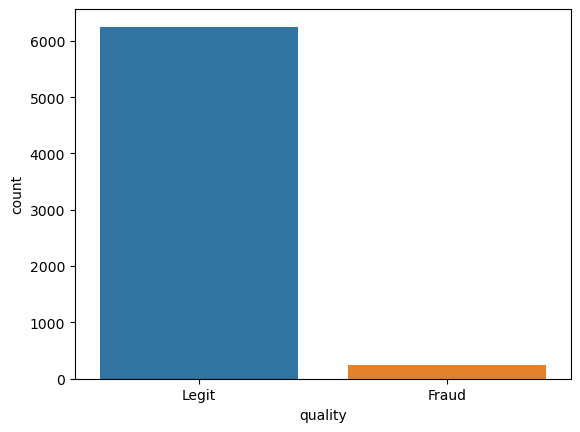

In [6]:
sns.countplot(data=df, x="quality")

<Axes: xlabel='type', ylabel='count'>

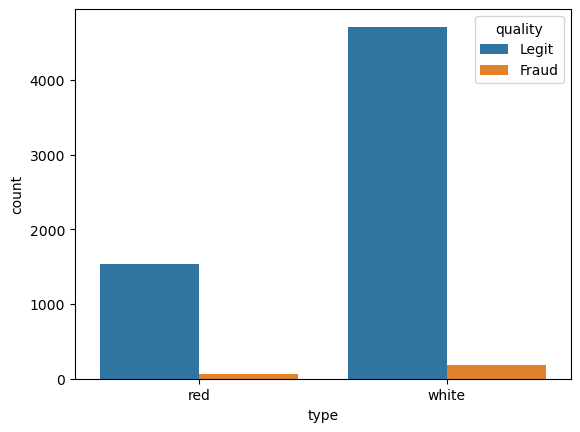

In [7]:
sns.countplot(data=df, hue="quality", x="type")

In [8]:
reds = df[df["type"] == "red"]

In [9]:
whites = df[df["type"] == "white"]

In [13]:
100 * len(reds[df["quality"] == "Fraud"]) / len(reds)

C:\Users\pc\AppData\Local\Temp\ipykernel_14268\3973387902.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  100 * len(reds[df["quality"] == "Fraud"]) / len(reds)


3.9399624765478425

In [14]:
100 * len(whites[df["quality"] == "Fraud"]) / len(whites)

C:\Users\pc\AppData\Local\Temp\ipykernel_14268\1341876596.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  100 * len(whites[df["quality"] == "Fraud"]) / len(whites)


3.736218864842793

In [15]:
df["Fraud"] = df["quality"].map({"Legit":0, "Fraud":1})

In [19]:
df.corr(numeric_only=True)["Fraud"][: -1].sort_values()

free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
Name: Fraud, dtype: float64

<Axes: >

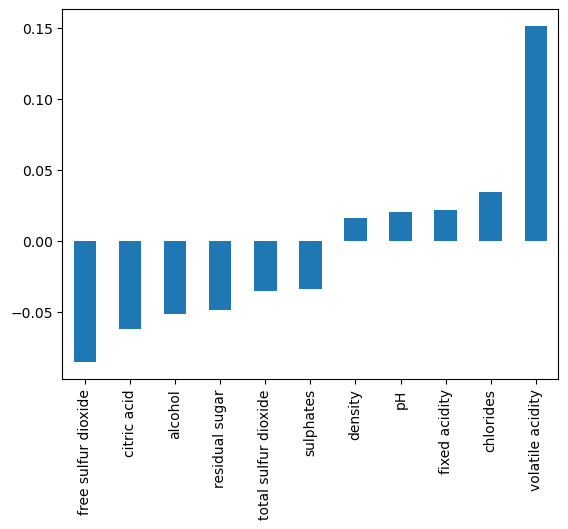

In [20]:
df.corr(numeric_only=True)["Fraud"][: -1].sort_values().plot(kind="bar")

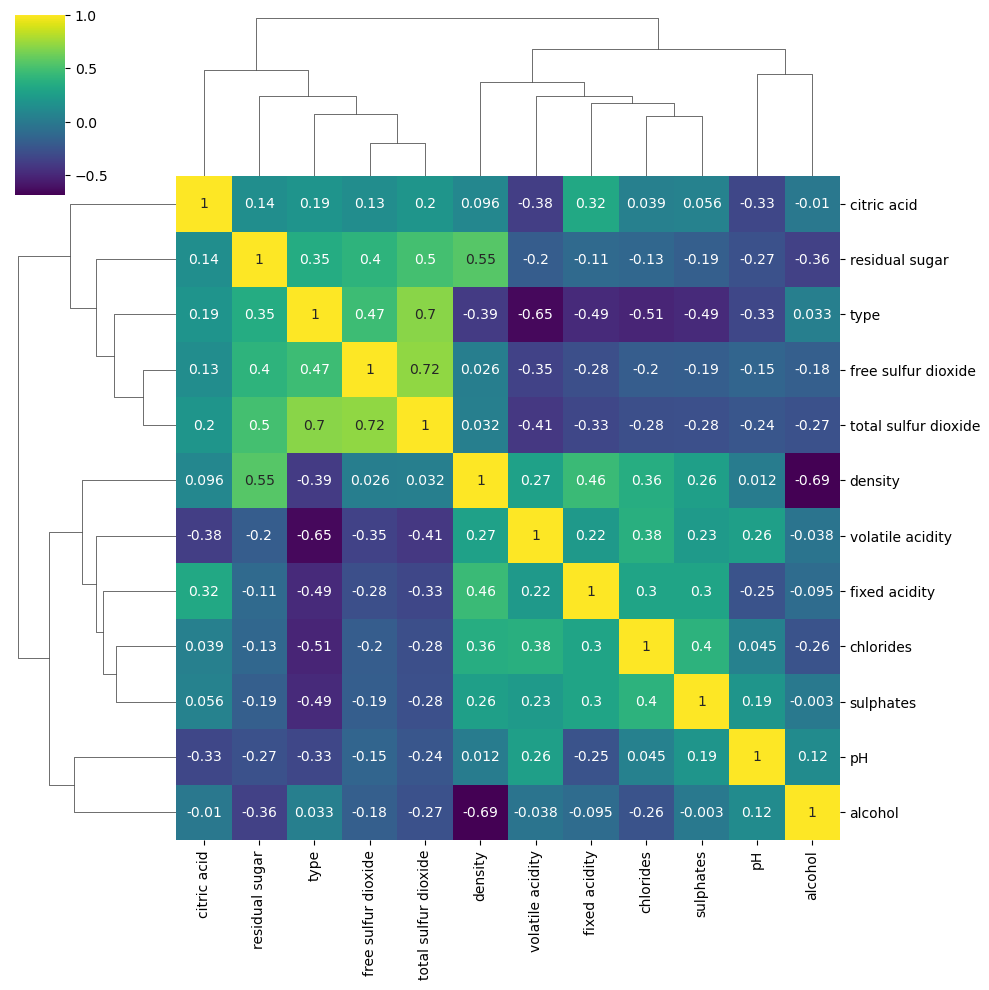

In [48]:
sns.clustermap(df.corr(numeric_only=True),cmap="viridis", annot=True)

In [22]:
df = df.drop("Fraud", axis=1)

In [23]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white


In [24]:
df["type"] = pd.get_dummies(df["type"], drop_first=True)

In [25]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [31]:
from sklearn.svm import SVC

In [32]:
svc = SVC(class_weight="balanced")

In [33]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {"C": [0.001, 0.01, 0.1, 0.5, 1],
             "kernel": ["linear", "poly", "rbf"],
             "gamma": ["scale", "auto"],
             "degree": [2, 3, 4]}

In [39]:
grid_model = GridSearchCV(svc, param_grid)

In [40]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [41]:
grid_model.best_params_

{'C': 0.001, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [43]:
grid_preds = grid_model.predict(scaled_X_test)

In [44]:
confusion_matrix(y_test, grid_preds)

array([[  3,  24],
       [  6, 617]], dtype=int64)

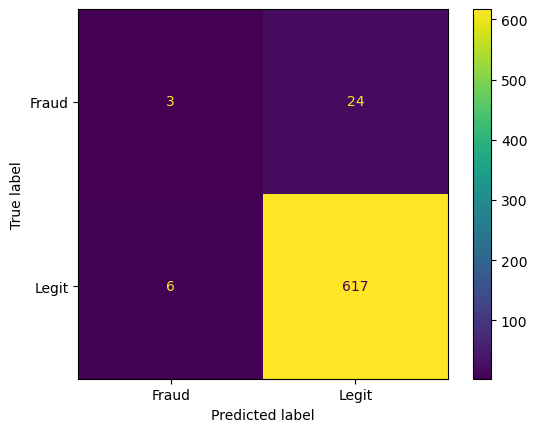

In [46]:
ConfusionMatrixDisplay.from_estimator(grid_model, scaled_X_test, y_test)

In [47]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

       Fraud       0.33      0.11      0.17        27
       Legit       0.96      0.99      0.98       623

    accuracy                           0.95       650
   macro avg       0.65      0.55      0.57       650
weighted avg       0.94      0.95      0.94       650



In [ ]:
# From the precision, recall, and f1-score for Fraud wines, 
# the model cannot rely on chemical analysis data to effectively predict whether wine is fraud or legit.